In [1]:
import random
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
import numpy as np
import math
import copy
from collections import defaultdict
from timeit import timeit
import time
from genetic_lib import *
from tqdm import tqdm

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)

In [2]:
from b_functions import *

In [6]:
def tester_find0(p):
    print(type(p[0]))
    return [m.eval(10) for m in p]

In [32]:
class basic_model(model):
    # find x
    init_range = (-10, 10)
    variance = 1
    birthRate = 5
    
        
    def __init__(self, x = None):
        self.x = x if x else random.uniform(*self.init_range)

    def params(self):
        return self.x
    
    def eval(self, target):
        return (target - self.x)**2, _
    
    def spawn(self):
        return [basic_model(self.x + random.gauss(0,self.variance)) for i in range(self.birthRate)]

In [33]:
p0 = [basic_model() for i in range(2)]
res = experiment(spawner, 10, selector_10, p0)

In [35]:
res

([[0.007834216792525082, 40.271867111503326],
  [1.0762636744468101,
   1.6827452147757167,
   0.6100660380336586,
   0.5895483307463724,
   0.00584762732562785,
   30.69720510927988,
   27.97238511523443,
   20.327589562493795,
   46.55435346549999,
   44.7173064572101],
  [0.6483309376943801,
   0.0736441322265556,
   0.8082927365054097,
   0.10886585872234283,
   0.8360005030725624,
   0.5360664515185223,
   0.10653138997262455,
   0.9695692658622549,
   0.7202586176045829,
   0.771927774395714,
   0.4905755403852559,
   0.3360116960151609,
   0.016132997161958443,
   0.4372653987766331,
   4.554166373814552,
   0.14808100650343864,
   1.3793040363665159,
   0.7260494330231477,
   1.577597083136792,
   0.004433548755057461,
   5.776397208989097,
   1.739846474317046,
   2.000842925549907,
   0.5792730502939657,
   0.778427482308056,
   38.49476309814267,
   15.036066144474185,
   25.65330563706136,
   29.119863688026452,
   43.63052111037333,
   28.117046539044786,
   23.08179058182

C:\Python39\lib\site-packages\numpy\core\_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)
C:\Python39\lib\site-packages\numpy\ma\core.py:2826: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


ValueError: x and y must be the same size

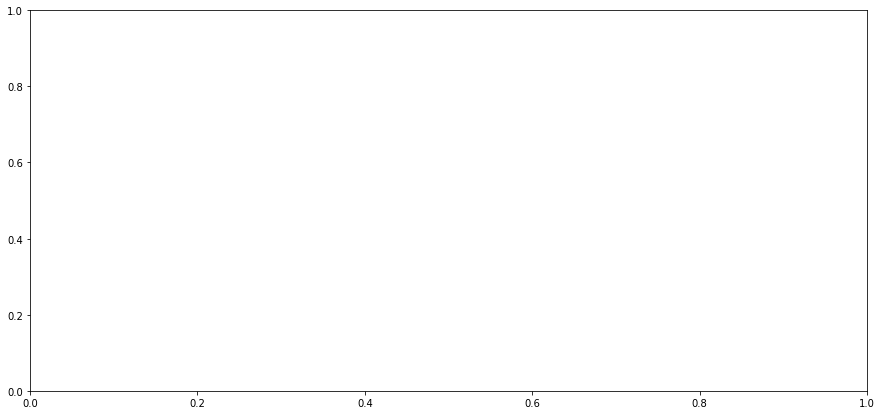

In [34]:
plt.scatter( range(10), [np.mean(x) for x in res])
plt.errorbar(range(10), [np.mean(x) for x in res], [np.std(x) for x in res])

In [11]:
scrs = [5,6,2,46,41,568]
f = ["t" , "gr3", "5f", "6fds", "fsa", "csf"]
# ii = np.argsort(scrs)
# ii
sorted(zip(scrs, f))

[(2, '5f'), (5, 't'), (6, 'gr3'), (41, 'fsa'), (46, '6fds'), (568, 'csf')]

In [12]:
class funcMin_model(model):
    # find x
    def __init__(self, x = None):
        self.x = x if x else random.uniform(-100, 100)
        self.variance = 1
        self.birthRate = 5
        
    def eval(self, target_func):
        return target_func(self.x)
    
    def spawn(self):
        return [funcMin_model(self.x + random.gauss(0,self.variance)) for i in range(self.birthRate)]
    def params(self):
        return self.x

In [13]:
def func_tester(p):
    return [m.eval(f3) for m in p]

In [14]:
p0 = [funcMin_model() for i in range(5)]
gen_scores, gen_params, gen_t = experiment(spawner, func_tester, selector_10, p0, max_generations = 30)

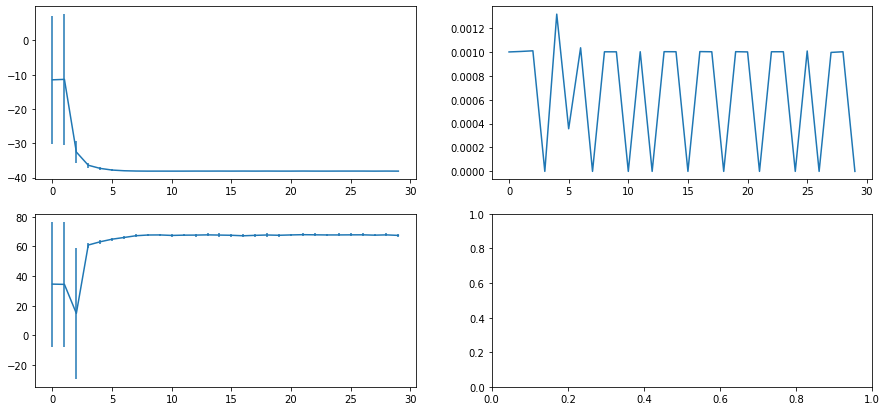

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# fig.figsize(20, 20)
axes[0][0].errorbar(range(len(gen_t)), [np.mean(x) for x in gen_scores], [np.std(x) for x in gen_scores])
axes[1][0].errorbar(range(len(gen_t)), [np.mean(x) for x in gen_params], [np.std(x) for x in gen_params])
axes[0][1].plot(range(len(gen_t)), gen_t)
plt.show()

# Neural Net genetic algo

In [9]:
import tensorflow.keras as tk
from tensorflow.keras.utils import to_categorical


KeyboardInterrupt: 

In [ ]:
def load_fashion_mnist_target_sets():
    fashion_mnist = tk.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#     class_names = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
#                             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
    
    train_images = train_images.reshape((60000, 28, 28, 1))
    train_images = train_images.astype('float32') / 255

    test_images = test_images.reshape((10000, 28, 28, 1))
    test_images = test_images.astype('float32') / 255
    
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)
    target_sets = train_images, train_labels, test_images, test_labels
    return target_sets

In [ ]:
target_sets = load_fashion_mnist_target_sets()
train_images, train_labels, test_images, test_labels = target_sets

In [ ]:
# fig=plt.figure(figsize=(7,7))
# for i in range(10):
#     fig.add_subplot(4,3,i+1)
#     idx = np.random.choice(np.where(train_labels==i)[0])
#     plt.imshow(train_images[idx,:,:], cmap='gray')
#     plt.axis('off')
#     plt.title(class_names[i])

In [ ]:
class nn_model(model):
    # find x
    epochs = 2
    steps_per_epoch = 90
    num_children = 2
    variance = 5
    birthRate = 2
    
    def __init__(self, layer_ws = None):
        self.inner_model = tk.models.Sequential([
            tk.layers.Flatten(input_shape=(28,28,1)), 
            tk.layers.Dense(128, activation='relu'), # alternatively you could use activation=tf.nn.relu
            tk.layers.Dense(10, activation='softmax')
        ])
        
        if layer_ws:
            for layer, layer_w in zip(self.inner_model.layers, layer_ws):
                layer.set_weights(layer_w)
                
#             print("spawn not implemented")
            
#         self.inner_model.summary()
        self.inner_model.compile(loss='categorical_crossentropy',
              optimizer=tk.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
        
        
    def eval(self, target_sets):
        train_images, train_labels, test_images, test_labels = target_sets
#         self.inner_model.fit(train_images, train_labels,
#             batch_size=100,
#             epochs=self.epochs,
#             steps_per_epoch=self.steps_per_epoch,
#             verbose=0)
        loss, acc = self.inner_model.evaluate(test_images, test_labels, verbose = 0)
        return (loss, acc)
    
    def spawn(self, mate):
        mate_layers = mate.params()
        local_layers = self.params()
        ans = []

        for i in range(self.num_children):
        # randomized
            combined_layers = \
            [[w1s + w2s + random.gauss(0,self.variance) for w1s, w2s in zip(w1, w2)] for w1, w2 in zip(mate_layers, local_layers)]
            ans += [nn_model(combined_layers)]
        return ans
    
    def params(self):
        return [layer.get_weights() for layer in self.inner_model.layers]

In [ ]:
# Base line
# nm = nn_model()
# nm.inner_model.fit(train_images, train_labels,
#     batch_size=100,
#     epochs=20,
#     steps_per_epoch=nm.steps_per_epoch,
#     verbose=1)
# nm.eval(target_sets)

In [ ]:
p0 = [nn_model() for i in range(12)]
gen_losses, gen_acces, gen_t = light_experiment(matched_spawner, target_sets, selector_10, p0, max_generations = 30)

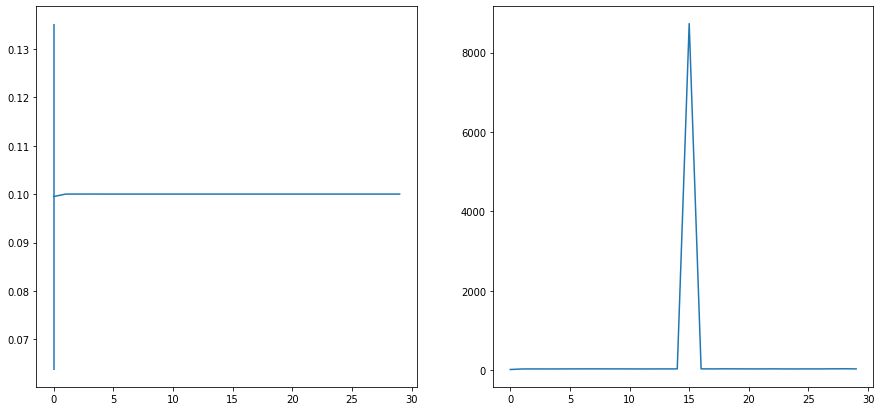

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)
# fig.figsize(20, 20)
axes[0].errorbar(range(len(gen_acces)), [np.mean(x) for x in gen_acces], [np.std(x) for x in gen_acces])
axes[1].plot(range(len(gen_t)), [np.mean(x) for x in gen_t])
plt.show()

In [14]:
gen_losses

[[2.5067505836486816,
  2.387268543243408,
  2.4896655082702637,
  2.4146523475646973,
  2.366990804672241,
  2.532466173171997,
  2.367886543273926,
  2.452869415283203,
  2.40392804145813,
  2.3532283306121826,
  2.3419487476348877,
  2.4654879570007324],
 [5410.59765625,
  2.30259108543396,
  1359.6800537109375,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  1544.509033203125,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  1194.3494873046875],
 [2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  785.2660522460938,
  2.30259108543396,
  10969.7900390625,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396,
  3724.49365234375,
  2.30259108543396,
  2.30259108543396,
  2.30259108543396

In [12]:
sorted(zip([1,5,2,3], [4, 1, '&', []]))[:10]

[(1, 4), (2, '&'), (3, []), (5, 1)]

In [11]:
np.argsort([0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10239999741315842, 0.10000000149011612])

array([ 0, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,
        1, 19, 18], dtype=int64)

In [10]:
ii = np.argsort([1,5,2,4])
ii

array([0, 2, 3, 1], dtype=int64)

In [13]:
a = [4, [], 's', 2]
a = np.array(a)
a[ii]

<ipython-input-13-dc920e4b4172>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array(a)


array([4, 's', 2, list([])], dtype=object)